In [19]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.layers import LSTM, Dense

# Load Dataset
df = pd.read_csv('traffic.csv')
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d-%m-%Y %H:%M')
df.set_index('DateTime', inplace=True)
# Data Preparation
scaler = MinMaxScaler(feature_range=(0, 1))
df['Vehicles'] = scaler.fit_transform(df[['Vehicles']])

# Sequence Creation
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length]
        label = data[i + seq_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 10  # Set your sequence length
sequences, labels = create_sequences(df['Vehicles'].values, sequence_length)

X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.2, random_state=42)
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Make Predictions
predictions = model.predict(X_test)

# Inverse Transform Predictions
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

actual_values = y_test.flatten()
predicted_values = predictions.flatten()

print("Actual Values:", actual_values)
print("Predicted Values:", predicted_values)
# Evaluate the model

r2 = r2_score(actual_values, predicted_values)

print(f'R-squared: {r2*100}')



c:\Users\srich\anaconda3\envs\traffic\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1203/1203 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0037 - val_loss: 8.6201e-04
301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.1678e-04
Test Loss: 0.000862007902469486
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Actual Values: [18. 17. 22. ...  8. 22. 72.]
Predicted Values: [11.982239 15.261603 22.153906 ...  9.131801 18.79903  64.82415 ]
R-squared: 93.5583140601932


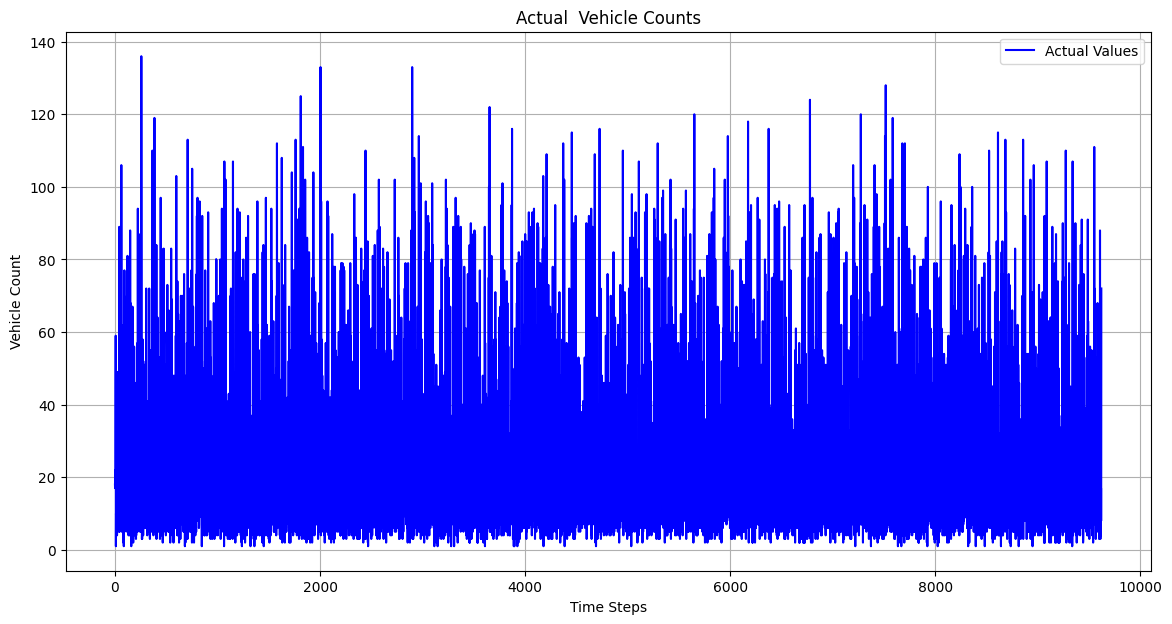

In [15]:
plt.figure(figsize=(14, 7))
plt.plot(actual_values, label='Actual Values', color='blue')
plt.title('Actual  Vehicle Counts')
plt.xlabel('Time Steps')
plt.ylabel('Vehicle Count')
plt.legend()
plt.grid(True)
plt.show()

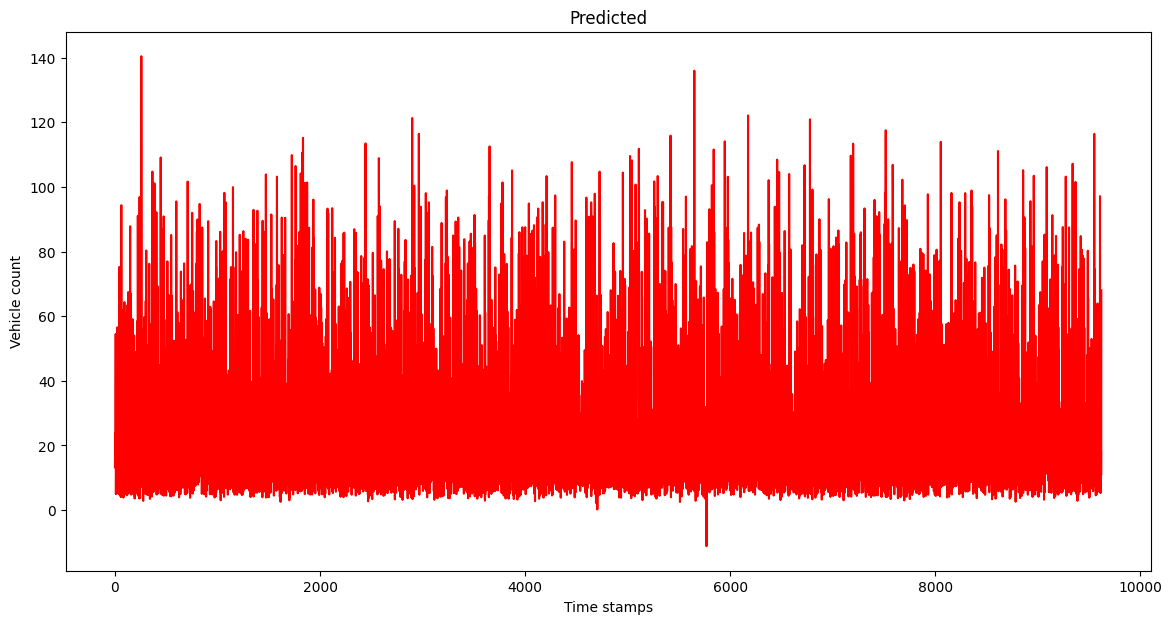

In [16]:
plt.figure(figsize=(14, 7))
plt.plot(predicted_values, label='Predicted Values', color='red')
plt.title("Predicted")
plt.xlabel("Time stamps")
plt.ylabel("Vehicle count")
plt.show()